# Data visualization

In [10]:
import pandas as pd
url_ca = 'https://www.casact.org/research/reserve_data/comauto_pos.csv'

df_ca = pd.read_csv(url_ca)

In [11]:
# Get some prior amounts and incrementals
df_ca_gb = df_ca.sort_values(
        by = ['GRNAME', 'AccidentYear', 'DevelopmentLag']
    ).groupby(
        ['AccidentYear', 'GRNAME']
    )
df_ca['prior_paid'] = df_ca_gb['CumPaidLoss_C'].shift(1)
df_ca['prior_incurred'] = df_ca_gb['IncurLoss_C'].shift(1)

df_ca['incremental_paid'] = df_ca['CumPaidLoss_C'] - df_ca['prior_paid']
df_ca['incremental_incurred'] = df_ca['IncurLoss_C'] - df_ca['prior_incurred']

In [12]:
df_one = df_ca.query(
      'GRNAME.str.contains("State Farm")'
    , engine = 'python'
)

df_one.shape

(100, 17)

In [13]:
df_one

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_C,CumPaidLoss_C,BulkLoss_C,EarnedPremDIR_C,EarnedPremCeded_C,EarnedPremNet_C,Single,PostedReserve97_C,prior_paid,prior_incurred,incremental_paid,incremental_incurred
1600,1767,State Farm Mut Grp,1988,1988,1,172262,54699,62031,290962,4584,286378,0,360657,NaN,NaN,NaN,NaN
1601,1767,State Farm Mut Grp,1988,1989,2,180112,108337,27264,290962,4584,286378,0,360657,54699.0,172262.0,53638.0,7850.0
1602,1767,State Farm Mut Grp,1988,1990,3,187158,143899,19021,290962,4584,286378,0,360657,108337.0,180112.0,35562.0,7046.0
1603,1767,State Farm Mut Grp,1988,1991,4,188775,164818,8713,290962,4584,286378,0,360657,143899.0,187158.0,20919.0,1617.0
1604,1767,State Farm Mut Grp,1988,1992,5,190569,179538,4419,290962,4584,286378,0,360657,164818.0,188775.0,14720.0,1794.0
1605,1767,State Farm Mut Grp,1988,1993,6,190701,185391,2559,290962,4584,286378,0,360657,179538.0,190569.0,5853.0,132.0
1606,1767,State Farm Mut Grp,1988,1994,7,190344,188023,992,290962,4584,286378,0,360657,185391.0,190701.0,2632.0,-357.0
1607,1767,State Farm Mut Grp,1988,1995,8,191752,189759,445,290962,4584,286378,0,360657,188023.0,190344.0,1736.0,1408.0
1608,1767,State Farm Mut Grp,1988,1996,9,192087,190520,220,290962,4584,286378,0,360657,189759.0,191752.0,761.0,335.0
1609,1767,State Farm Mut Grp,1988,1997,10,194099,193499,99,290962,4584,286378,0,360657,190520.0,192087.0,2979.0,2012.0


## Matplotlib

* Very common library, good starting point
* Comparable to base R
* Gets the job done, let's you get on with your life
* Not super pretty

In [14]:
from matplotlib import pyplot as plt

### Magic commands

https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib

In [15]:
# tell Jupyter to plot graphs
# %matplotlib inline

### Scatterplot

In [16]:
df_1988 = df_one[df_one['AccidentYear'] == 1988]

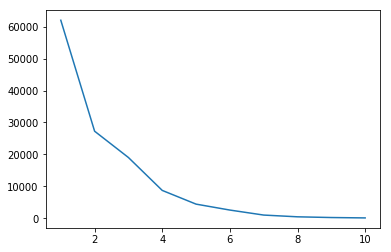

In [17]:
plt.plot(
      df_1988['DevelopmentLag']
    , df_1988['BulkLoss_C']
)

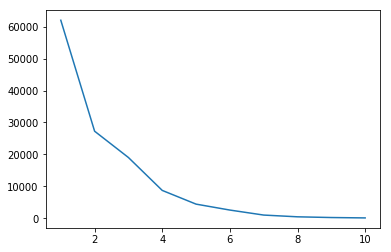

In [18]:
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , data = df_1988
)

Change some visual characteristics with function arguments.

Decorate the plot with functions like `title()` and `ylabel()`

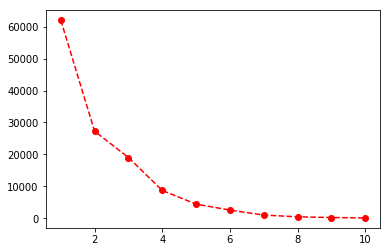

In [19]:
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , data = df_1988
    , color = 'red'
    , marker = 'o'
    , linestyle = 'dashed'
)


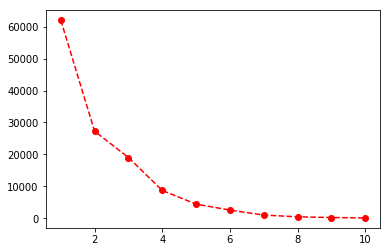

In [20]:
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , 'ro--'
    , data = df_1988
)

Text(0, 0.5, 'IBNR ($000s)')

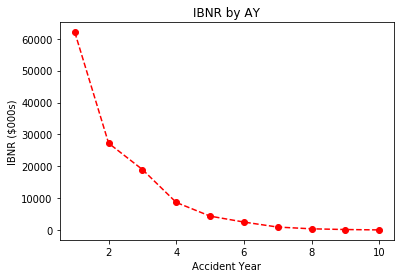

In [21]:
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , 'ro--'
    , data = df_1988
)
plt.title('IBNR by AY')
plt.xlabel('Accident Year')
plt.ylabel("IBNR ($000s)")

### Multiple series

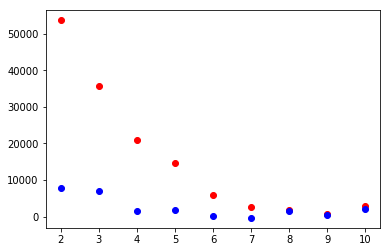

In [22]:
plt.plot(
      df_1988['DevelopmentLag']
    , df_1988['incremental_paid']
    , 'ro'
    , df_1988['DevelopmentLag']
    , df_1988['incremental_incurred']
    , 'bo'
)

In [ ]:
plt.plot(
      'DevelopmentLag'
    , 'incremental_paid'
    , 'ro'
    , data = df_1988
)
plt.plot(
      'DevelopmentLag'
    , 'incremental_incurred'
    , 'bo'
    , data = df_1988
)

### Styling

In [ ]:
plt.style.use('ggplot')
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , data = df_1988
)

In [ ]:
plt.style.available

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(
      'DevelopmentLag'
    , 'BulkLoss_C'
    , data = df_1988
)

plt.style.use('default')

In [ ]:
# if you like TeX
import numpy as np
xs = np.linspace(1/10000, .5, 10000)
ys = np.sin(1/xs)
plt.plot(xs, ys, linewidth=0.5, label='For legend')
plt.gca().set(title='Graph of $\sin(x^{-1})$)')
plt.legend(title='Legend Title')

## Other Options

Task | Solution | 
:--|:--|
Format axis labels | Tough
Control y-axis limits | xlim, ylim | 
suppress line | linestyle='' 
multiple series | plot(x,y, a, b) etc. or sequential plots 
suppress marker |  marker=''
marker labels | label='asdf' and add plt.legend()

## Seaborn

* Wrapper around matplotlib to make life easier
* Smells a little like ggplot2

> If matplotlib tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too. 
  (Michael Waskom, *Introduction to Seaborn*)

In [ ]:
import seaborn as sns
# need searborn 0.9.0 or later for relplot

sns.set()
sns.relplot(
      x = "DevelopmentLag"
    , y = "CumPaidLoss_C"
    , hue = "AccidentYear"
    , data = df_one
    , kind = 'line'
)

histogram?
density plots?
residuals?

In [ ]:
sns.relplot(
      x = "DevelopmentLag"
    , y = "CumPaidLoss_C"
    , hue = "AccidentYear"
    , markers = True
    , kind = 'line'
    , data = df_one
)

In [ ]:
sns.relplot(
      x = "DevelopmentLag"
    , y = "CumPaidLoss_C"
    , units = "AccidentYear"
    , markers = True
    , kind = 'line'
    , data = df_one
    , estimator = None
)

In [ ]:
sns.relplot(
      x = "DevelopmentLag"
    , y = "CumPaidLoss_C"
    , data = df_one
    , kind = 'line'
    , col = "AccidentYear"
    , col_wrap = 3
)

In [ ]:
sns.lmplot(
      x = "prior_paid"
    , y = "incremental_paid"
    , data = df_one
)

In [ ]:
sns.lmplot(
      x = "prior_paid"
    , y = "incremental_paid"
    , hue = 'DevelopmentLag'
    , data = df_one
)

In [ ]:
sns.lmplot(
      x = "prior_paid"
    , y = "incremental_paid"
    , hue = 'DevelopmentLag'
    , data = df_one
    , col = "DevelopmentLag"
    , col_wrap = 3
)

In [ ]:
sns.residplot(
      x = "DevelopmentLag"
    , y = "incremental_paid"
    , data = df_one)